In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [27]:
# Importing the dataset
dataset = pd.read_csv('china_gdp.csv')
Xt = dataset.Year.values
yt = dataset.Value.values
X=Xt/max(Xt)
y=yt/max(yt)
dataset.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
Year     55 non-null int64
Value    55 non-null float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [5]:
dataset.shape

(55, 2)

In [6]:
dataset.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


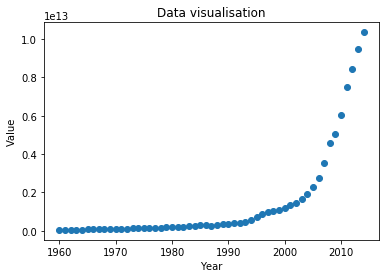

In [7]:
plt.scatter(dataset.Year,dataset.Value)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Data visualisation")
plt.show()

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Fitting Polynomial Regression to the dataset
XX=X.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(XX)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print ('Coefficients: ', pol_reg.coef_)
print ('Intercept: ',pol_reg.intercept_)

Coefficients:  [        0.         -58406559.52104107  89122479.16439816
 -60440021.58002876  15370482.12011258]
Intercept:  14353620.835307961


In [25]:
 test_x_poly = poly_reg.fit_transform(X_test.reshape(-1,1))
 y_pred = pol_reg.predict(test_x_poly)
 from sklearn import metrics
 print("Mean absolute error (MAE)     :{}".format(np.mean(np.absolute(y_test - y_pred))))
 print("Residual sum of squares (RMSE):{}".format(np.mean((y_test - y_pred) ** 2)))
 print("R2 score (R2)  :{}".format(metrics.r2_score(y_test, y_pred)))

Mean absolute error (MAE)     :0.016664008665537536
Residual sum of squares (RMSE):0.0005200685778216677
R2 score (R2)  :0.9321021059266571


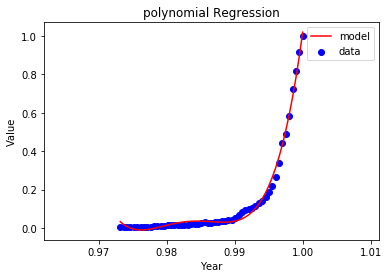

In [26]:
# Visualizing the Polymonial Regression results
plt.scatter(X, y, color='blue',label="data")
plt.plot(XX, pol_reg.predict(X_poly), color='red',label="model")
plt.title('polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()